This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization
and was developed by Matt Newville: https://github.com/newville.

In [1]:
#install lmfit

#uncomment the following lines to install lmfit

#from subprocess import call
# call(['pip', 'install', 'lmfit'])
# call(['pip', 'install', 'matplotlib'])
#call(['pip', 'install', 'ipympl'])

#import libraries
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit.models import GaussianModel, MoffatModel
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import matplotlib.lines as mlines
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


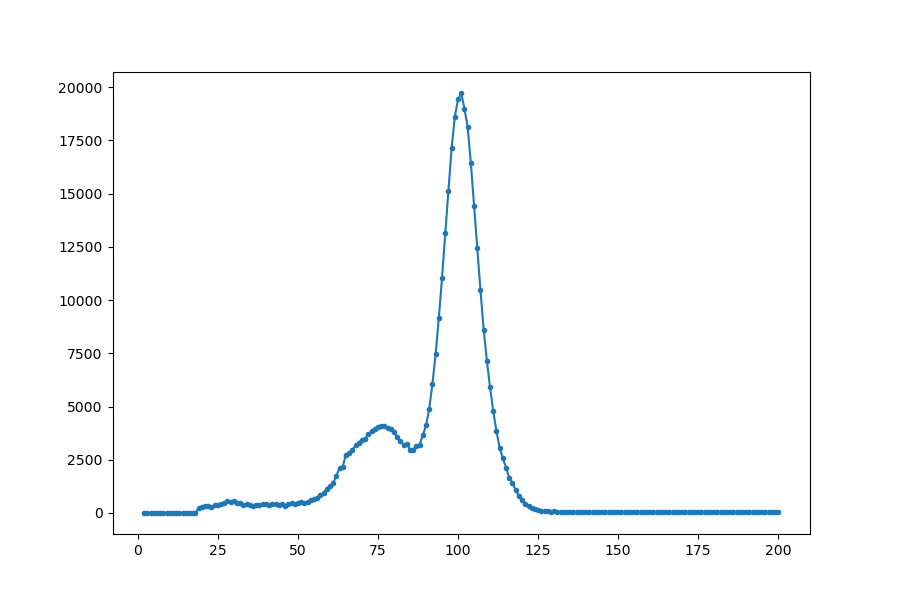

In [2]:
#Uncomment the next line to make the graph interactive
%matplotlib widget
#%matplotlib inline 

plt.figure(figsize=(9,6))

# Load the data
df = pd.read_csv("./Data/Co57_vs_channel.csv", sep=" ")
df.rename(columns={"1": "Channel", "0": "Counts"}, inplace=True)

df = df[df['Channel'] <= 200]

#preview the spectrum
plt.plot('Channel', 'Counts', data = df, marker = ".")

plt.show()

In [11]:
# Define the channel ranges
channel_ranges = [0,23, 36, 90, 110, 400]

# Create labels for the ranges
labels = [f"Range {i}-{j}" for i, j in zip(channel_ranges[:-1], channel_ranges[1:])]

# Use pd.cut() to categorize the data into the specified ranges
df['Channel Range'] = pd.cut(df['Channel'], bins=channel_ranges, labels=labels, include_lowest=True)

# Create a dictionary of DataFrames, one for each channel range
channel_range_dfs = {label: group for label, group in df.groupby('Channel Range')}

# Access individual DataFrames using keys (e.g., channel_range_dfs['Range 0-40'])
channel_range_dfs['Range 90-110'].head()

,Channel,Counts,Channel Range
89,91,4897,Range 90-110
90,92,6062,Range 90-110
91,93,7462,Range 90-110
92,94,9163,Range 90-110
93,95,11048,Range 90-110


In [16]:
#use builtin NameModel, specify prefix for each:
mod2 = MoffatModel(prefix='g2_') 
mod4 = MoffatModel(prefix='g4_')


In [17]:
#set initial parameters
pars2 = mod2.make_params(g2_amplitude=570.0, g2_center=29.0, g2_sigma=2.17, g2_beta=1)                          
pars4 = mod4.make_params(g4_amplitude=19773.0, g4_center=100.0, g4_sigma=3.34, g4_beta=1)                         


In [18]:
#fit with weights=1./yerr
result2 = mod2.fit(channel_range_dfs['Range 23-36']['Counts'], pars2, x = channel_range_dfs['Range 23-36']['Channel'])
result4 = mod4.fit(channel_range_dfs['Range 90-110']['Counts'], pars4, x = channel_range_dfs['Range 90-110']['Channel'])


In [19]:
#print the Fit Statistics and parameters
print()
print(result2.fit_report())
print()
print(result4.fit_report())
print()


[[Model]]
    Model(moffat, prefix='g2_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 13
    # variables        = 4
    chi-square         = 4194.32378
    reduced chi-square = 466.035976
    Akaike info crit   = 83.0949947
    Bayesian info crit = 85.3547921
    R-squared          = 0.92487971
[[Variables]]
    g2_amplitude:  542.484225 +/- 16.9552884 (3.13%) (init = 570)
    g2_center:     29.3730292 +/- 0.19022809 (0.65%) (init = 29)
    g2_sigma:      1.94417137 +/- 0.81755336 (42.05%) (init = 2.17)
    g2_beta:       0.17870379 +/- 0.05879289 (32.90%) (init = 1)
    g2_fwhm:       26.7600729 +/- 7.43285736 (27.78%) == '2*g2_sigma*sqrt(2**(1.0/max(1e-3, g2_beta))-1)'
    g2_height:     542.484225 +/- 16.9552884 (3.13%) == 'g2_amplitude'
[[Correlations]] (unreported correlations are < 0.100)
    C(g2_sigma, g2_beta)      = +0.9566
    C(g2_amplitude, g2_sigma) = -0.6977
    C(g2_amplitude, g2_beta)  = -0.5014

[[Model]]
 

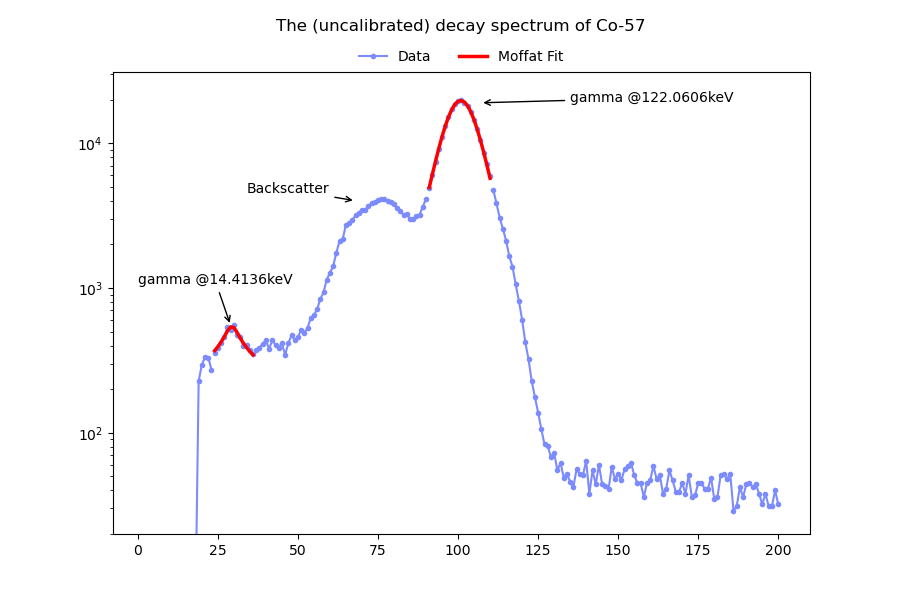

In [30]:
%matplotlib widget

plt.figure(figsize=(9,6))

#plot data and models
plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 0-23'], color = '#7c8bfd', marker = ".")

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 23-36'], color = '#7c8bfd', marker = ".")
plt.plot(channel_range_dfs['Range 23-36']['Channel'], result2.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 36-90'], color = '#7c8bfd', marker = ".")

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 90-110'], color = '#7c8bfd', marker = ".")
plt.plot(channel_range_dfs['Range 90-110']['Channel'], result4.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 110-400'], color = '#7c8bfd', marker = ".")



plt.title('The (uncalibrated) decay spectrum of Co-57', y = 1.07)

plt.ylim(20, 31000)

#uncomment the line bellow to activate the semilog scale
plt.yscale('log')

#make annotations
plt.annotate('Backscatter', xy=(68, 4000), xytext=(34, 4500),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )

plt.annotate('gamma @122.0606keV', xy=(107, 19000), xytext=(135, 19200),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )

plt.annotate('gamma @14.4136keV', xy=(29, 550), xytext=(0, 1060),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )


# Create legend entries for the blue and red lines (data and model) and display the legend
blue_line = mlines.Line2D([], [], linestyle = None, color='#7c8bfd', marker = ".", label='Data')

red_line = mlines.Line2D([], [], color='red', label='Moffat Fit', linewidth=2.5)

plt.legend([blue_line, red_line], ['Data', 'Moffat Fit'], loc='lower center', bbox_to_anchor= (0.5, 1.005), ncol=2,
            borderaxespad=0, frameon=False)


#show the plot
plt.show()





---

## References

### **The images below are included as a reference for the decay scheme and gamma ray energies** 

![](./img/Co_spectrum.png)

https://gammaray.inl.gov/SiteAssets/catalogs/nai/pdf/ba133.pdf


![](./img/Co_gamma.png)

https://gammaray.inl.gov/SiteAssets/catalogs/nai/pdf/ba133.pdf


![](./img/Co_energy_table.png)


https://ehs.stanford.edu/reference/co-57-radionuclide-fact-sheet